# TF-IDF Analyses

### Import and Install Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import mannwhitneyu
from tqdm import tqdm
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import nltk
import os

In [2]:
awards_data_cleaned = pd.read_csv("awards_data_cleaned.csv")

In [3]:
# Step 1: Create and fit the vectorizer
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(awards_data_cleaned['Abstract'])

# Step 2: Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [4]:
# add year variable to tfidf_df
tfidf_df['Year'] = awards_data_cleaned['Year']
# tfidf_df has each row as an abstract and each column as a word, with the values being the TF-IDF scores

In [5]:
# View top ten words by year

top_words_by_year = {}

for year in sorted(tfidf_df['Year'].unique()):
    subset = tfidf_df[tfidf_df['Year'] == year].drop(columns='Year')
    word_sums = subset.sum()
    top_words = word_sums.sort_values(ascending=False).head(10)
    
    formatted = [f"{word} ({score:.4f})" for word, score in top_words.items()]
    top_words_by_year[str(year)] = formatted

top_words_table = pd.DataFrame(top_words_by_year)

top_words_table

,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
0,research (57.5647),research (62.3792),research (51.0049),research (71.5860),research (64.8587),project (66.8535),project (70.4592),project (54.0313),research (56.4680),project (30.0434)
1,student (48.3861),student (50.7016),student (45.9759),project (63.7279),project (64.6633),research (57.3831),research (62.9066),research (51.4973),project (55.4986),research (26.9913)
2,project (40.0100),project (48.1711),project (39.0881),student (63.3917),student (55.8896),student (51.5363),student (52.4681),student (46.5725),student (46.9014),datum (17.5327)
3,use (32.3146),datum (35.1419),datum (33.4367),datum (38.9842),datum (40.8780),datum (36.8454),datum (37.5363),datum (32.4014),datum (31.6006),fellowship (16.1666)
4,datum (30.1874),program (34.8484),program (27.5416),program (38.3786),program (37.7671),program (35.1339),teacher (37.3403),use (29.9645),program (31.0837),student (15.7679)
5,program (29.7177),science (32.9204),use (26.9762),use (37.9242),science (36.5609),use (35.1058),stem (37.2079),program (28.8553),use (31.0673),use (15.6437)
6,material (28.6328),use (32.2810),science (24.9116),science (37.6734),use (35.6952),model (32.4206),use (35.9897),model (27.3460),model (27.8660),science (14.4733)
7,science (27.7329),study (28.4464),new (24.8183),stem (32.8541),model (34.2343),develop (30.7371),program (35.8756),develop (26.3977),new (27.4633),new (14.4438)
8,model (27.4923),model (28.3505),model (24.5654),new (32.3707),new (33.0175),stem (30.4326),science (33.6578),stem (24.4607),technology (27.1278),support (13.9320)
9,provide (26.8827),new (27.4306),material (23.2630),develop (32.3324),develop (30.1191),teacher (29.7663),model (32.3099),new (24.2200),science (27.0846),model (13.1137)


In [6]:
# all abstracts together in a list
full_text = ' '.join(awards_data_cleaned['Abstract'].tolist())

# tokenize by word
words = full_text.split()
words = full_text.lower().split()

# create a set of unique words
unique_words = set(words)

# count them
print(f"Number of unique words: {len(unique_words)}")
print(f"Number of observations in tfidf_df: {len(tfidf_df)}")   
print(f"Number of features in tfidf_df: {len(tfidf_df.columns)}")


Number of unique words: 71215
Number of observations in tfidf_df: 15290
Number of features in tfidf_df: 70857


In [7]:
word_columns = tfidf_df.columns.drop('Year')

yearly_avg = tfidf_df.groupby('Year')[word_columns].mean() # create yearly averages of tf-idf scores

years = sorted(yearly_avg.index.tolist()) # get the years in order

### Year to Year Cosine Differences

In [8]:
from sklearn.metrics.pairwise import cosine_distances

# Compute cosine distances between year vectors
cosine_dists = cosine_distances(yearly_avg.values)

# Convert to a DataFrame for readability
cosine_dists_df = pd.DataFrame(
    cosine_dists,
    index=yearly_avg.index,
    columns=yearly_avg.index
)

cosine_dists_df 

Year,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Year,,,,,,,,,,
2016,0.000000,0.037962,0.038773,0.049468,0.045440,0.064334,0.069529,0.060380,0.063048,0.087384
2017,0.037962,0.000000,0.034767,0.032437,0.031364,0.054156,0.046683,0.049350,0.053856,0.070983
2018,0.038773,0.034767,0.000000,0.034079,0.032950,0.047917,0.054276,0.040428,0.045674,0.083908
2019,0.049468,0.032437,0.034079,0.000000,0.025246,0.041282,0.036086,0.038170,0.038920,0.068377
2020,0.045440,0.031364,0.032950,0.025246,0.000000,0.038227,0.033341,0.036220,0.041789,0.063118
2021,0.064334,0.054156,0.047917,0.041282,0.038227,0.000000,0.035799,0.034643,0.041729,0.083518
2022,0.069529,0.046683,0.054276,0.036086,0.033341,0.035799,0.000000,0.040268,0.047382,0.072899
2023,0.060380,0.049350,0.040428,0.038170,0.036220,0.034643,0.040268,0.000000,0.033722,0.076219
2024,0.063048,0.053856,0.045674,0.038920,0.041789,0.041729,0.047382,0.033722,0.000000,0.065173


In [9]:
years = sorted(cosine_dists_df.index.tolist())

# Collect consecutive year distances
consec_diffs = []

for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]
    dist = cosine_dists_df.loc[year1, year2]

    consec_diffs.append({
        'Year1': year1,
        'Year2': year2,
        'Cosine_Distance': dist
    })

# Convert to DataFrame
consec_diffs_df = pd.DataFrame(consec_diffs)

consec_diffs_df.sort_values('Cosine_Distance', ascending=False)


,Year1,Year2,Cosine_Distance
8,2024,2025,0.065173
6,2022,2023,0.040268
4,2020,2021,0.038227
0,2016,2017,0.037962
5,2021,2022,0.035799
1,2017,2018,0.034767
2,2018,2019,0.034079
7,2023,2024,0.033722
3,2019,2020,0.025246


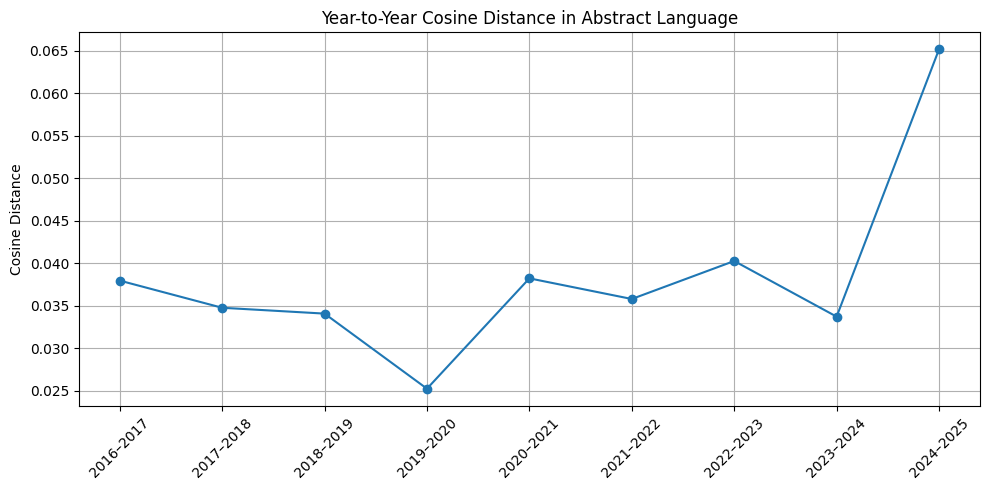

In [10]:
import matplotlib.pyplot as plt

# Create a label for the x-axis like "2016–2017", "2017–2018", ...
consec_diffs_df['Year_Pair'] = consec_diffs_df['Year1'].astype(str) + '–' + consec_diffs_df['Year2'].astype(str)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(consec_diffs_df['Year_Pair'], consec_diffs_df['Cosine_Distance'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.ylabel('Cosine Distance')
plt.title('Year-to-Year Cosine Distance in Abstract Language')
plt.grid(True)
plt.tight_layout()
plt.show()

### Statistically Testing Year-to-Year Changes in TF-IDF Scores

In [11]:
years = sorted(tfidf_df['Year'].unique())

results = [] # store p-values

Using Mann-Whitney U Tests to compare the TF-IDF distributions of each word between two consecutive years - attempting to answer if those distributions differ significantly.

In [12]:
from cliffs_delta import cliffs_delta

In [14]:
# loop through consecutive years and calculate p-values using Mann-Whitney U test
for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i + 1]

    group1 = tfidf_df[tfidf_df['Year'] == year1][word_columns]
    group2 = tfidf_df[tfidf_df['Year'] == year2][word_columns]

    for word in word_columns:
        try:
            prop1 = (group1[word] > 0).mean()
            prop2 = (group2[word] > 0).mean()
            effect_size = prop2 - prop1



            stat, p = mannwhitneyu(group1[word], group2[word], alternative='two-sided')

            results.append({
                'Year1': year1,
                'Year2': year2,
                'word': word,
                'U_stat': stat,
                'p_value': p,
                'prop1': prop1,
                'prop2': prop2,
                'effect_size': effect_size
            })

        except ValueError:
            # Skip if both groups are all zeros or identical
            continue

In [20]:
# put the Mann Whitney U test results into a DataFrame
results_df = pd.DataFrame(results)

# Add significance flag, using FDR correction
from statsmodels.stats.multitest import multipletests

results_df['FDR_corrected'], results_df['q_value'], _, _ = multipletests(results_df['p_value'], method='fdr_bh')

results_df['significant'] = results_df['q_value'] < 0.05


In [21]:
results_df.to_csv("results_df.csv", index=False)

In [22]:
summary_df = (
    results_df.groupby(['Year1', 'Year2'])['significant']
    .sum()
    .reset_index()
    .rename(columns={'significant': 'num_significant_words'})
    .sort_values('num_significant_words', ascending=False)
)

In [23]:
summary_df
# 2024-2025 has greatest number of shifts

,Year1,Year2,num_significant_words
4,2020,2021,23
8,2024,2025,18
5,2021,2022,17
6,2022,2023,16
2,2018,2019,13
3,2019,2020,13
0,2016,2017,9
7,2023,2024,7
1,2017,2018,6


In [25]:
# words that changed significantly in 2024 to 2025
sig_words_24_25 = (
    results_df[
        (results_df['Year1'] == 2024) &
        (results_df['Year2'] == 2025) &
        (results_df['significant'] == True)
    ][['word', 'p_value', 'q_value', 'effect_size']]
    .sort_values('q_value')  # or sort by 'effect_size' if you prefer
)

sig_words_24_25

,word,p_value,q_value,effect_size
633457,underrepresented,2.344187e-22,1.660997e-17,-0.155643
588129,fellowship,1.087427e-14,3.852537e-10,0.045691
590262,fy,1.775973e-14,5.662725e-10,0.037641
626696,sponsoring,1.190941e-13,3.164449e-09,0.036993
605926,minority,2.731098e-11,5.618168e-07,-0.067910
576562,climate,1.014389e-09,1.577757e-05,-0.078653
631351,title,2.676427e-09,3.792818e-05,0.036133
583311,diverse,8.320436e-09,1.061195e-04,-0.098913
608427,national,1.186512e-08,1.427629e-04,-0.096333
599975,knowledge,2.805559e-08,2.981860e-04,-0.105470


In [26]:
# words that changed significantly in 2020 to 2021
sig_words_20_21 = (
    results_df[
        (results_df['Year1'] == 2020) &
        (results_df['Year2'] == 2021) &
        (results_df['significant'] == True)
    ][['word', 'p_value', 'q_value', 'effect_size']]
    .sort_values('q_value')  # or sort by 'effect_size' if you prefer
)

sig_words_20_21

,word,p_value,q_value,effect_size
295993,covid,2.062936e-21,1.315543e-16,0.056186
329593,pandemic,2.735200e-19,1.585680e-14,0.049930
315983,june,5.525318e-09,7.340661e-05,-0.023854
308357,grant,8.771192e-09,1.096750e-04,-0.047850
334263,project,1.437149e-08,1.666319e-04,0.059029
343272,sponsoring,1.642246e-08,1.837311e-04,-0.020621
306838,fy,1.642246e-08,1.837311e-04,-0.020621
284690,aim,2.486942e-08,2.688022e-04,0.087695
294819,conference,4.423725e-08,4.550044e-04,-0.053850
313033,impactcommercial,6.063373e-08,5.817482e-04,0.042670


### TF-IDF Visualizations

In [27]:
years = sorted(tfidf_df['Year'].unique())
years

[2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

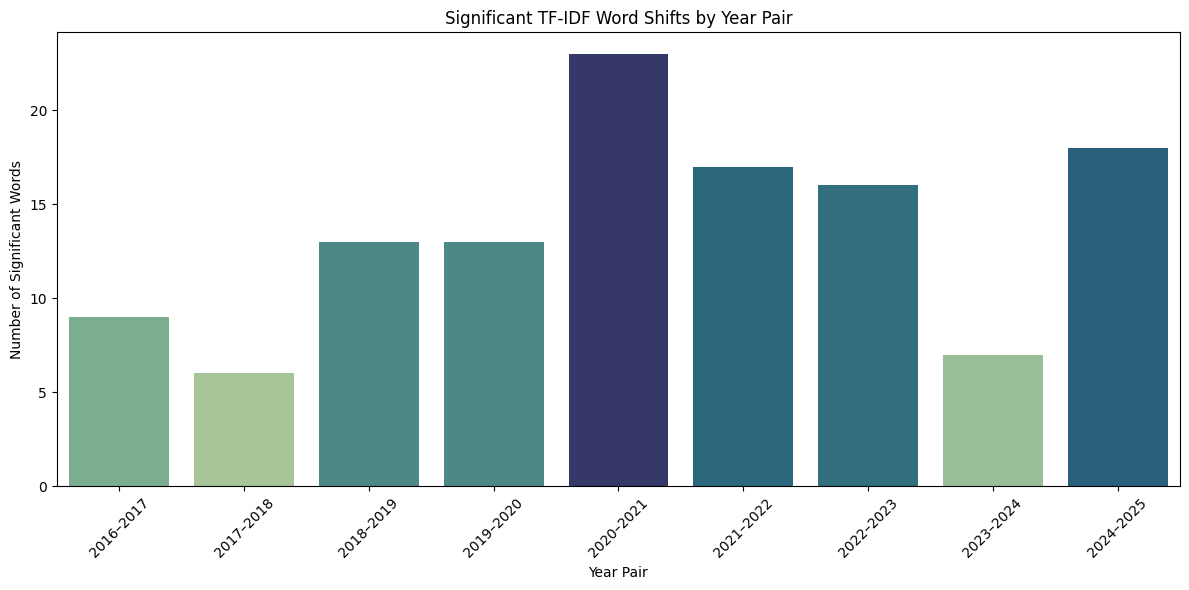

In [28]:
# Filter for significant results
sig_df = results_df[results_df['significant']].copy()

# Create year-pair label like "2016–2017"
sig_df['year_pair'] = sig_df['Year1'].astype(str) + '–' + sig_df['Year2'].astype(str)

# Count significant words by year-pair
pair_counts = (
    sig_df.groupby('year_pair')
    .size()
    .reset_index(name='num_significant_words')
)

import seaborn as sns
import matplotlib.pyplot as plt

# Create the barplot with color intensity based on bar height
plt.figure(figsize=(12, 6))
sns.barplot(
    data=pair_counts,
    x='year_pair',
    y='num_significant_words',
    hue='num_significant_words',
    palette='crest',  # try 'crest' or 'flare'
    dodge=False,
)

plt.xticks(rotation=45)
plt.xlabel('Year Pair')
plt.ylabel('Number of Significant Words')
plt.title('Significant TF-IDF Word Shifts by Year Pair')
plt.legend([],[], frameon=False)  # Remove legend since color = height
plt.tight_layout()
plt.show()

### Should I normalize?
 
 Let's check

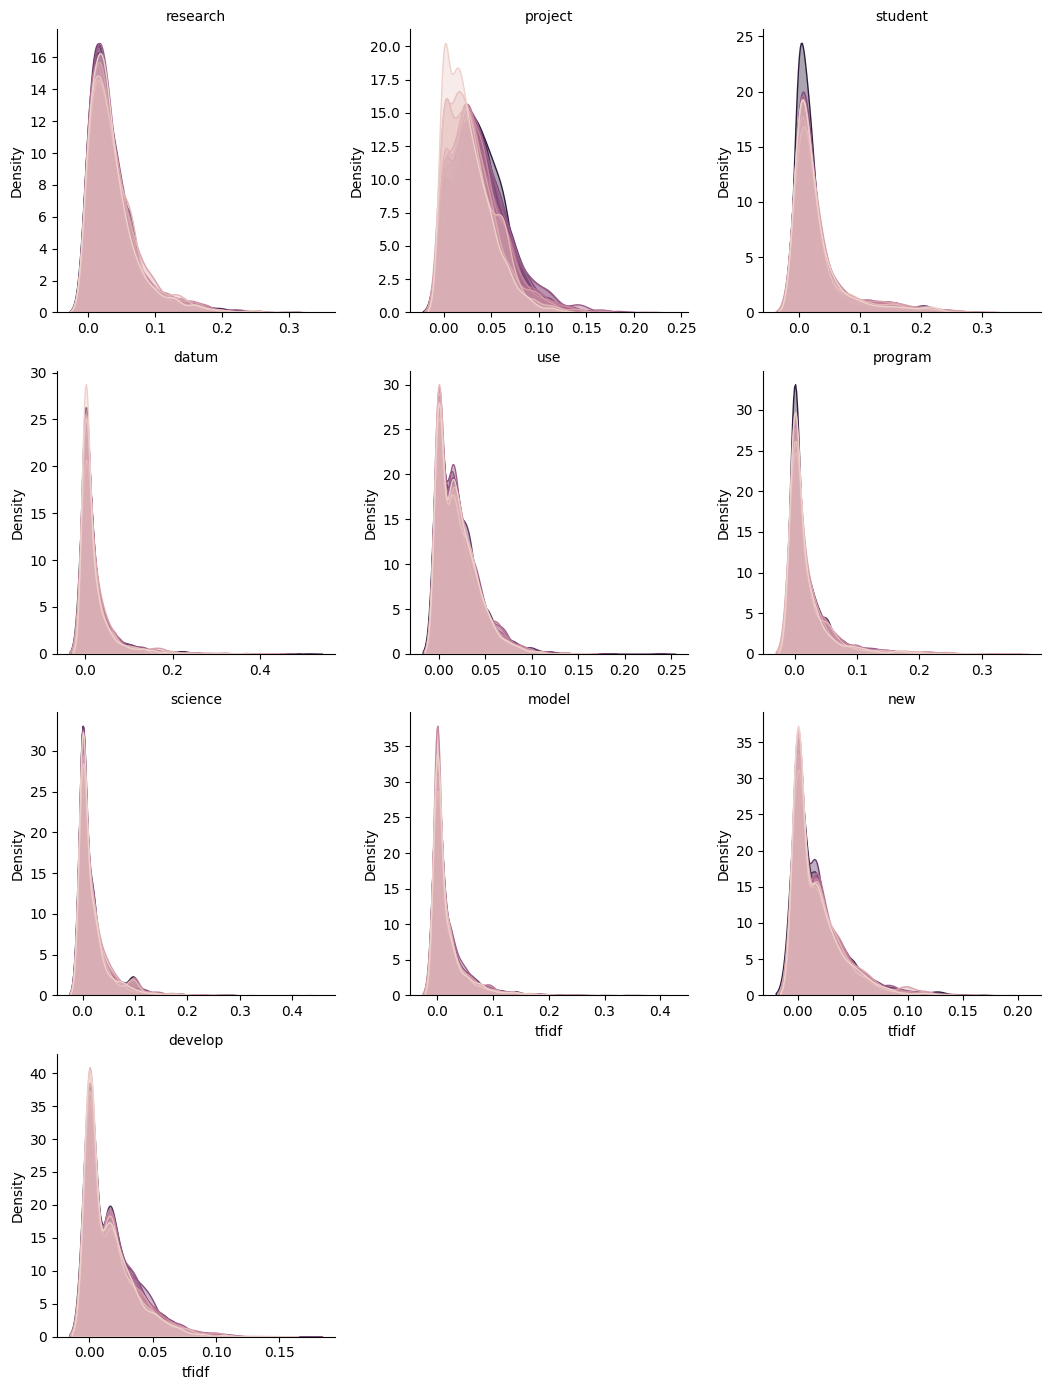

In [83]:
top_words = tfidf_df[word_cols].mean().sort_values(ascending=False).head(10).index.tolist()

tfidf_melted = tfidf_df[['Year'] + top_words].melt(id_vars='Year', var_name='word', value_name='tfidf')

import seaborn as sns
import matplotlib.pyplot as plt

# Plot one density plot per word, colored by year
g = sns.FacetGrid(tfidf_melted, col='word', col_wrap=3, height=3.5, sharex=False, sharey=False)
g.map_dataframe(sns.kdeplot, x='tfidf', hue='Year', common_norm=False, fill=True, alpha=0.4)
g.add_legend()
g.set_titles(col_template="{col_name}")
plt.tight_layout()
plt.show()

# so maybe i should normalize

### Normalization Code - IF I need to normalize

In [ ]:
# Exclude 'Year'
word_cols = tfidf_df.columns.drop('Year')

from sklearn.preprocessing import StandardScaler

tfidf_zscore = []

for year, group in tfidf_df.groupby('Year'):
    X = group[word_cols].values
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Rebuild a DataFrame for this year
    df_scaled = pd.DataFrame(X_scaled, columns=word_cols)
    df_scaled['Year'] = year
    tfidf_zscore.append(df_scaled)

# Combine all years back into one DataFrame
tfidf_zscore = pd.concat(tfidf_zscore, ignore_index=True)

In [85]:
from scipy.stats import mannwhitneyu

def run_stat_tests(df, year1, year2):
    group1 = df[df['Year'] == year1][word_cols]
    group2 = df[df['Year'] == year2][word_cols]
    
    results = []

    for word in word_cols:
        try:
            stat, p = mannwhitneyu(group1[word], group2[word], alternative='two-sided')
            med1 = group1[word].median()
            med2 = group2[word].median()
            effect = med2 - med1
            results.append({'word': word, 'p_value': p, 'effect_size': effect})
        except ValueError:
            continue
    
    return pd.DataFrame(results)

In [86]:
results_raw = run_stat_tests(tfidf_df, 2024, 2025)
results_norm = run_stat_tests(tfidf_zscore, 2024, 2025)

In [87]:
from statsmodels.stats.multitest import multipletests

# FDR correction
results_raw['q'] = multipletests(results_raw['p_value'], method='fdr_bh')[1]
results_norm['q'] = multipletests(results_norm['p_value'], method='fdr_bh')[1]

# Flag significant
results_raw['significant'] = results_raw['q'] < 0.05
results_norm['significant'] = results_norm['q'] < 0.05

# Compare counts
print("Raw TF-IDF: ", results_raw['significant'].sum(), "significant words")
print("Z-score TF-IDF: ", results_norm['significant'].sum(), "significant words")

Raw TF-IDF:  20 significant words
Z-score TF-IDF:  24270 significant words


In [88]:
sig_words_raw = set(results_raw[results_raw['significant']]['word'])
sig_words_norm = set(results_norm[results_norm['significant']]['word'])

print("Overlap:", len(sig_words_raw & sig_words_norm))
print("Only in raw:", len(sig_words_raw - sig_words_norm))
print("Only in normalized:", len(sig_words_norm - sig_words_raw))

Overlap: 20
Only in raw: 0
Only in normalized: 24250


In [ ]:
import seaborn as sns
sns.histplot(results_raw['p_value'], bins=50, color='blue', label='raw', kde=True)
sns.histplot(results_norm['p_value'], bins=50, color='red', label='zscore', kde=True)
plt.legend()

### 2025-2025 Deep Dive

In [29]:
subset_2425 = results_df[
    (results_df['Year1'] == 2024) & 
    (results_df['Year2'] == 2025) & 
    (results_df['significant'] == True)
]

subset_2425

,Year1,Year2,word,U_stat,p_value,prop1,prop2,effect_size,FDR_corrected,q_value,significant
574661,2024,2025,career,668938.5,5.086904e-06,0.287938,0.205772,-0.082166,True,2.922468e-02,True
576562,2024,2025,climate,662756.5,1.014389e-09,0.122568,0.043915,-0.078653,True,1.577757e-05,True
582217,2024,2025,development,692652.5,6.112104e-08,0.533722,0.412798,-0.120924,True,5.817482e-04,True
583311,2024,2025,diverse,675631.0,8.320436e-09,0.224384,0.125471,-0.098913,True,1.061195e-04,True
585919,2024,2025,engineering,672967.5,1.197683e-07,0.242542,0.150565,-0.091978,True,1.004957e-03,True
586413,2024,2025,equity,635237.0,3.282853e-07,0.035019,0.001255,-0.033765,True,2.553035e-03,True
587660,2024,2025,faculty,661762.5,1.002365e-07,0.151102,0.072773,-0.078330,True,8.637999e-04,True
588129,2024,2025,fellowship,586331.0,1.087427e-14,0.003243,0.048934,0.045691,True,3.852537e-10,True
590262,2024,2025,fy,591357.0,1.775973e-14,0.000000,0.037641,0.037641,True,5.662725e-10,True
596739,2024,2025,inclusive,638671.0,2.761051e-06,0.051881,0.012547,-0.039334,True,1.760733e-02,True


/var/folders/ms/yvnygwhs3jq6kw556d3s72lc0000gn/T/ipykernel_46269/4014360140.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('coolwarm_r')


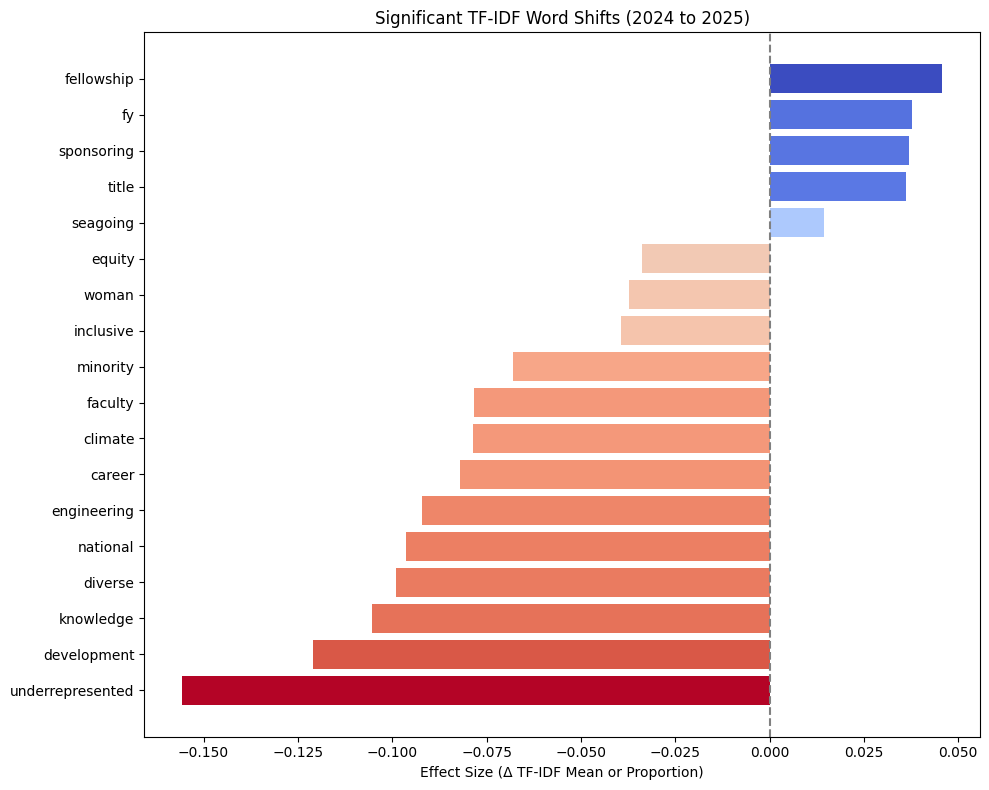

In [34]:
# Sort the data by effect size
subset_sorted = subset_2425.sort_values(by='effect_size')

# Normalize the effect size values to [0, 1] for color mapping
norm = mcolors.TwoSlopeNorm(vmin=subset_sorted['effect_size'].min(),
                            vcenter=0,
                            vmax=subset_sorted['effect_size'].max())

# Choose a diverging colormap
cmap = cm.get_cmap('coolwarm_r')

# Map effect sizes to colors
colors = cmap(norm(subset_sorted['effect_size']))

# Plot
plt.figure(figsize=(10, 8))
bars = plt.barh(subset_sorted['word'], subset_sorted['effect_size'], color=colors)

plt.axvline(0, color='gray', linestyle='--')
plt.xlabel('Effect Size (Δ TF-IDF Mean or Proportion)')
plt.title('Significant TF-IDF Word Shifts (2024 to 2025)')
plt.tight_layout()
plt.show()